![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the BSc-level course **Mechanical Properties of Loose Rocks and Soils**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics

# Beschreibung von Kornverteilungskurven

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact
import scipy as sp
from scipy import interpolate
import pandas as pd

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/kornverteilungskurve_plots.ipynb

Im Zuge der Bestimmung einer Sieblinie wurden folgende Siebrückstände ermittelt:

In [2]:
Siebdurchmesser = np.array([63,31.5,16,8,4,2,1,0.5,0.25,0.125,0.063,0.001])#letzter: Rückstand in Null
Startwerte = np.array([0,0,842.4,1059.8,1222.9,788.0,706.6,407.6,210.0,195.7,10.8,0])

Massen = [widgets.FloatText(value=Startwerte[i],description=str(Siebdurchmesser[i])+' mm') for i in range(len(Siebdurchmesser))]
Eingabe=widgets.VBox(Massen)
Eingabe

In [3]:
m_i = Siebmassen(Eingabe)
dm_i = Masseanteile(m_i)
sum_dm_i = Siebdurchgang(dm_i)

Die einzelnen zu den Siebdurchmessern $d_i$ gehörigen Siebrückstände $m_i$ können nun auf die Gesamtmasse $m_\text{d} = \sum m_i$ (Annahme vernachlässigbarer Siebverluste) bezogen werden, womit die Masseanteile

$$
    x_i = \frac{m_i}{m_\text{d}}
$$

ermittelt werden. Diese werden typischerweise in einer Summenkurve

$$
    F(d_i) = \sum \limits_{k=1}^i x_i
$$

aufgetragen. Dabei wird aufgrund der über Größenordnungen verteilten Korndurchmesser eine halblogarithmische Darstellung gewählt (siehe folgende Abbildung, rechts). Feinanteile, die nicht durch Siebung näher untersucht werden, sind nicht mit dargestellt. In der linken Abbildung sind die Masseanteile selbst und das zugehörige Histogramm der Masseverteilung dargestellt.

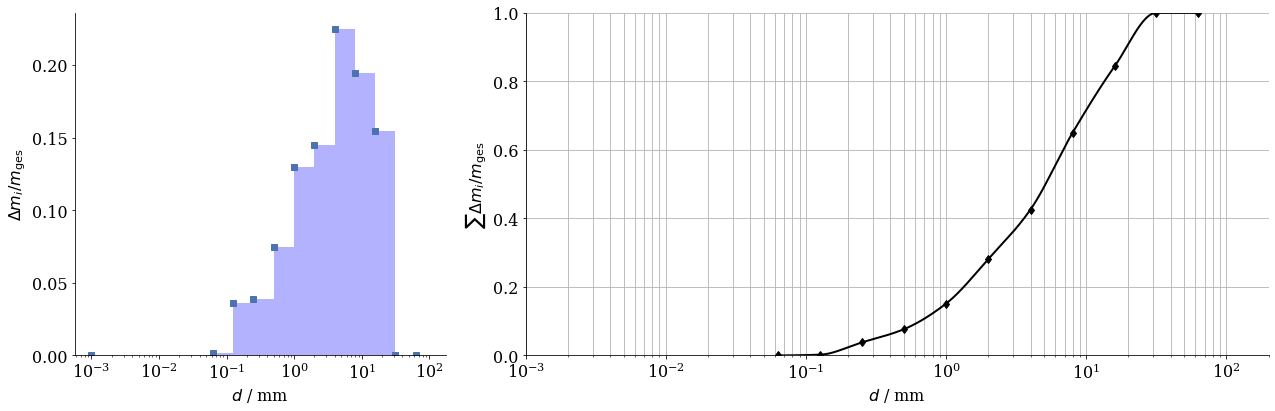

In [4]:
plot_Rohdaten(dm_i,sum_dm_i)

Mithilve der Körnungslinie bzw. Kornverteilungskurve können die dominierenden Bestandteile (T, U, S, G) ermittelt werden. Des weiteren können die Ungleichförmigkeitszahl

$$
    C_U = \frac{d_{60}}{d_{10}}
$$

und die Krümmungszahl

$$
    C_C = \frac{d_{30}^2}{d_{10}\ d_{60}}
$$

abgeleitet werden.

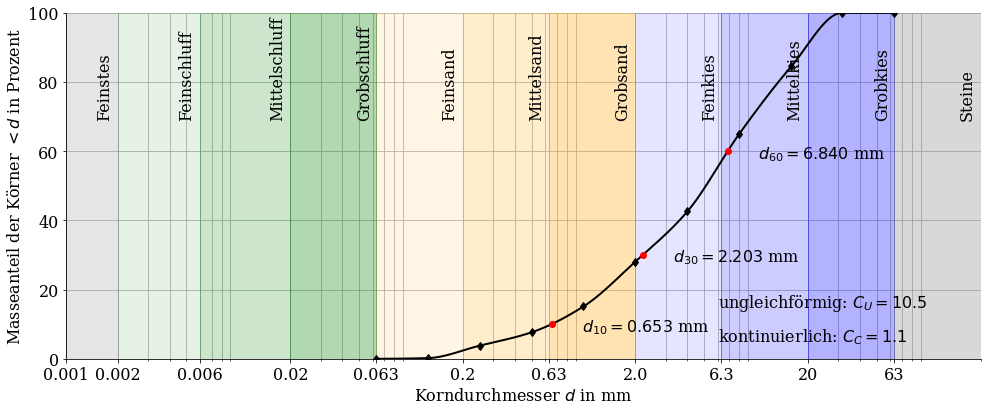

In [5]:
plot_KVK(sum_dm_i)

Damit lassen sich die Masseanteile der einzelnen Kornfraktionen ablesen:

In [6]:
Anteile(Siebdurchmesser,sum_dm_i)

,U,fS,mS,gS,fG,mG,gG
0,0.0,2.39,7.25,18.47,29.06,33.81,9.02


Betrachten wir nun eine Mischung zweier gleichförmiger Böden mit unterschiedlichen mittleren Korndurchmessern.

In [7]:
m_1 = np.array([0,0,0,0,0,0,0,0,20,60,20,0])
dm_1 = Masseanteile(m_1)
sum_dm_1 = Siebdurchgang(dm_1)

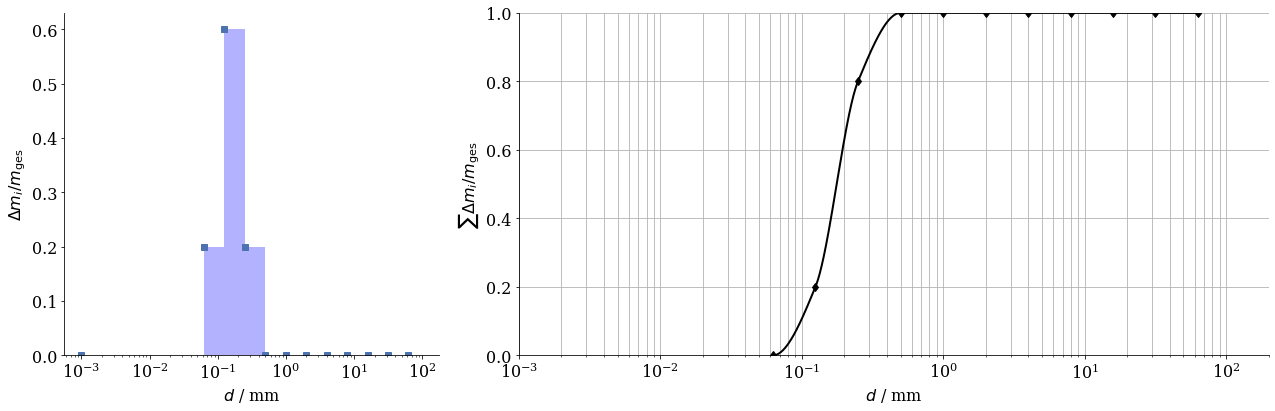

In [8]:
plot_Rohdaten(dm_1,sum_dm_1)

In [9]:
m_2 = np.array([0,0,0,60,180,60,1,1,0,0,0,0])
dm_2 = Masseanteile(m_2)
sum_dm_2 = Siebdurchgang(dm_2)

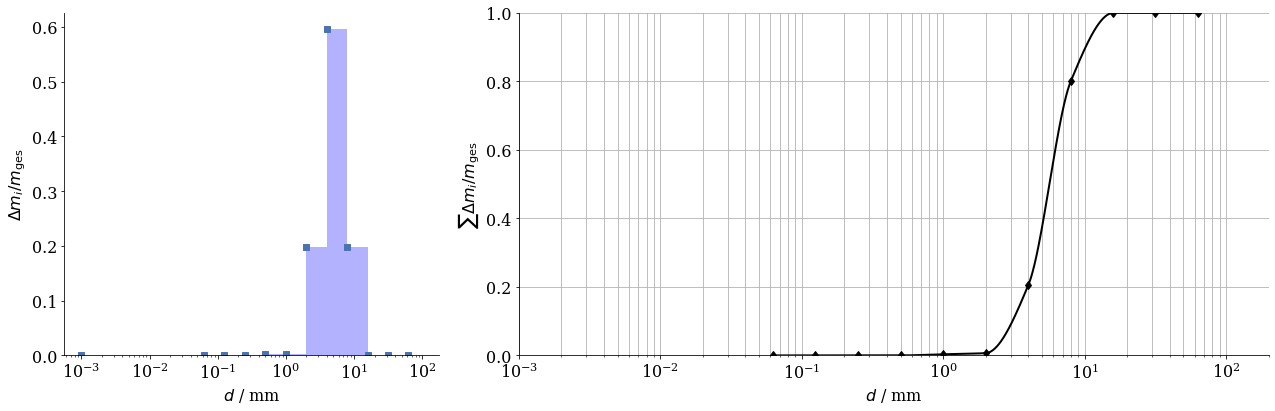

In [10]:
plot_Rohdaten(dm_2,sum_dm_2)

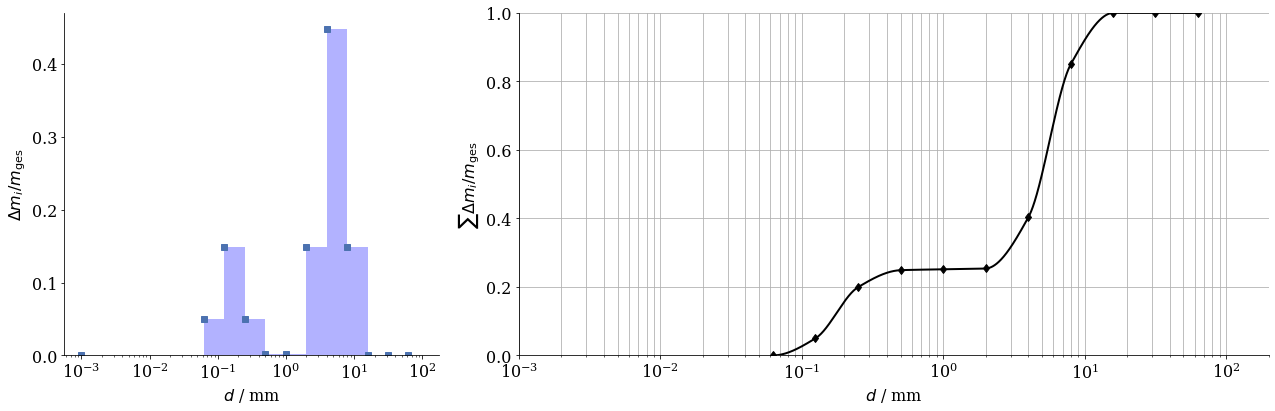

In [11]:
m_12 = m_1 + m_2
dm_12 = Masseanteile(m_12)
sum_dm_12 = Siebdurchgang(dm_12)
plot_Rohdaten(dm_12,sum_dm_12)

Es ergibt sich eine erwartungsgemäß eine bimodale Verteilung.

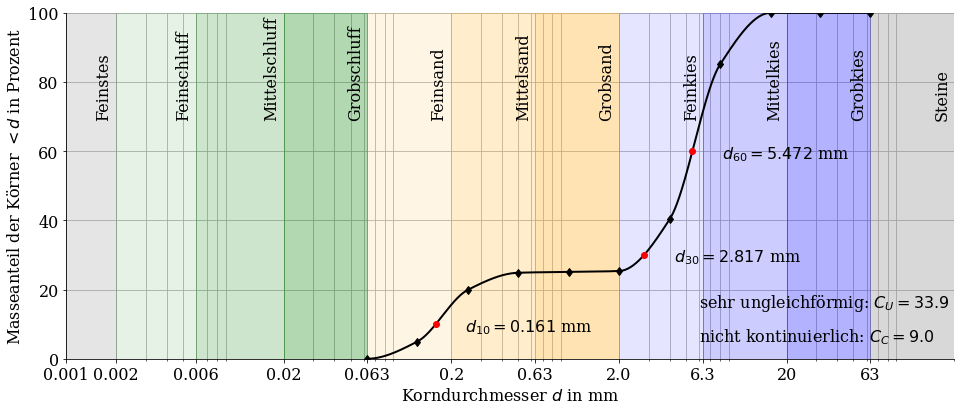

In [12]:
plot_KVK(sum_dm_12)